<a href="https://colab.research.google.com/github/nman7/Facial-Gender-classification/blob/master/Detectfacialgender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#initialising NN
import tensorflow as tf
from tensorflow.keras.models import Sequential
#convolution layers
from tensorflow.keras.layers import Convolution2D
#pooling layers
from tensorflow.keras.layers import MaxPooling2D
#convert pool layer to vector form
from tensorflow.keras.layers import Flatten
#initialising  fully connected layer or hidden layer
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.nn import local_response_normalization
from tensorflow.keras.layers import LayerNormalization,BatchNormalization,Dropout

In [ ]:
#initialising cnn
classifier =  tf.keras.Sequential()
classifier.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same', activation='relu', input_shape=(128,128,3)))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size=2))
classifier.add(Dropout(0.2))

classifier.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same', activation='relu'))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size=2))
classifier.add(Dropout(0.2))

classifier.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same', activation='relu'))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size=2))
classifier.add(Dropout(0.2))

classifier.add(tf.keras.layers.Flatten())
classifier.add(tf.keras.layers.Dense(264, activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.3))
classifier.add(tf.keras.layers.Dense(1, activation='sigmoid'))

classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [ ]:
#fitting images to CNN for training
from keras.preprocessing.image import ImageDataGenerator 
train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        '/content/dataset1/train',
        target_size=(128,128),
        batch_size=18,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        '/content/dataset1/test',
        target_size=(128,128),
        batch_size=18,
        class_mode='binary')


'''
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=30),
             ModelCheckpoint(filepath='128ebismillahfacecolab.h5', monitor='val_loss', save_best_only=True)]'''
print(training_set.class_indices)

history = classifier.fit_generator(
        training_set,
        epochs=500,
        validation_data=test_set)

Using TensorFlow backend.


Found 1600 images belonging to 2 classes.
Found 340 images belonging to 2 classes.
{'man': 0, 'woman': 1}
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/500
89/89 [==============================] - 9s 101ms/step - loss: 0.7842 - accuracy: 0.5025 - val_loss: 0.6834 - val_accuracy: 0.5441
Epoch 2/500
89/89 [==============================] - 9s 100ms/step - loss: 0.6648 - accuracy: 0.6244 - val_loss: 0.5637 - val_accuracy: 0.7706
Epoch 3/500
89/89 [==============================] - 9s 99ms/step - loss: 0.6019 - accuracy: 0.6756 - val_loss: 0.4645 - val_accuracy: 0.8324
Epoch 4/500
89/89 [==============================] - 9s 100ms/step - loss: 0.5439 - accuracy: 0.7362 - val_loss: 0.4343 - val_accuracy: 0.8176
Epoch 5/500
89/89 [==============================] - 9s 100ms/step - loss: 0.5157 - accuracy: 0.7425 - val_loss: 0.4198 - val_accuracy: 0.8706
Epoch 6/500
89/89 [==============================] - 9s 101ms/step - loss: 0.4872 - accuracy: 0.7700 - v

In [ ]:
classifier.save('detectfacemodel.h5')

In [ ]:
print(training_set.class_indices)


{'man': 0, 'woman': 1}


<Figure size 432x288 with 0 Axes>

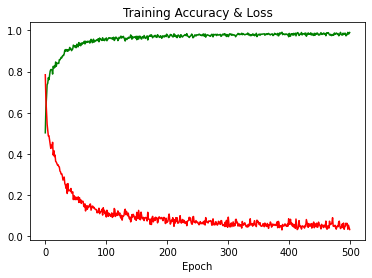

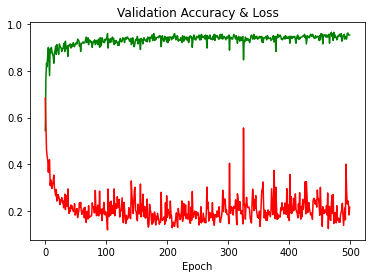

<Figure size 432x288 with 0 Axes>

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'],'green',label='Accuracy')
plt.plot(history.history['loss'],'red',label='Loss')
plt.title('Training Accuracy & Loss')
plt.xlabel('Epoch')
plt.figure()
plt.plot(history.history['val_accuracy'],'green',label='Accuracy')
plt.plot(history.history['val_loss'],'red',label='Loss')
plt.title('Validation Accuracy & Loss')
plt.xlabel('Epoch')
plt.figure()

In [ ]:

from tensorflow.keras.models import load_model
man=0
women=0
model = load_model('detectfacemodel.h5')
imgwomen = cv2.imread('/content/person.jfif')
plt.imshow(imgwomen)
imgwomen= cv2.resize(imgwomen, (128,128))
imgwomen = imgwomen.reshape(1,128,128,3)
pred = model.predict_classes(imgwomen)
if pred==0:
  print('men')
else:
  print('women')



In [ ]:
man=0
women=0

from tensorflow.keras.models import load_model
model = load_model('detectfacemodel.h5')
import glob
cv_img = []
for img in glob.glob("/content/dataset1/test/man//*.jpg"):
    n= cv2.imread(img)
    cv_img.append(n)
for i in cv_img:
  imgwomen= cv2.resize(i, (128,128))
  imgwomen = imgwomen.reshape(1,128,128,3)
  pred = model.predict_classes(imgwomen)
  if pred==0:
    man=man+1
  else:
    women=women+1



In [ ]:
print(man,women)

126 44


In [ ]:
(126*100)/180

70.0